In [1]:
import Mapping_Functions as mf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Path to nd2 image directories

In [2]:
path_10X = 'genotyping/cycle_1'
path_40X = 'phenotyping'

Create dataframes containing the coordinates and names of tile in a well 

In [6]:
Tile_List_10X = mf.Get_Tile_Coordinates(path_10X, n_well=1)
Tile_List_40X = mf.Get_Tile_Coordinates(path_40X, n_well=1)

Tile_List_10X.to_csv('Tile_List_10X.csv', index=False)
Tile_List_40X.to_csv('Tile_List_40X.csv', index=False)

Reading tile metadata from directory


100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


Reading tile metadata from directory


100%|██████████| 90/90 [00:06<00:00, 14.50it/s]


Transform dataframe into a tile layout matrix.
2D array with position of tiles by tile number.
-1 means no tile exhists there.

In [7]:
Tile_List_10X = pd.read_csv('Tile_List_10X.csv')
Tile_List_40X = pd.read_csv('Tile_List_40X.csv')

M_10X = mf.Arrange_Tiles(Tile_List_10X, h=2304, w=2304, plot_location=False)
M_40X = mf.Arrange_Tiles(Tile_List_40X, h=2304, w=2304, plot_location=False)

# M_10X = np.load('M_10X.npy')
# M_40X = np.load('M_40X.npy')

# pd.DataFrame(M_10X).to_csv('M_10X.csv')
# pd.DataFrame(M_40X).to_csv('M_40X.csv')

In [12]:
print(M_10X)
print('')
print(M_40X)

[[34 35]
 [50 49]]

[[ 504  503  502  501  500  499  498  497  496  495]
 [ 560  561  562  563  564  565  566  567  568  569]
 [ 628  627  626  625  624  623  622  621  620  619]
 [ 688  689  690  691  692  693  694  695  696  697]
 [ 760  759  758  757  756  755  754  753  752  751]
 [ 824  825  826  827  828  829  830  831  832  833]
 [ 899  898  897  896  895  894  893  892  891  890]
 [ 965  966  967  968  969  970  971  972  973  974]
 [1043 1042 1041 1040 1039 1038 1037 1036 1035 1034]]


Stitch 4 adjacent tiles into a single image.
Helps QC tile orientation.

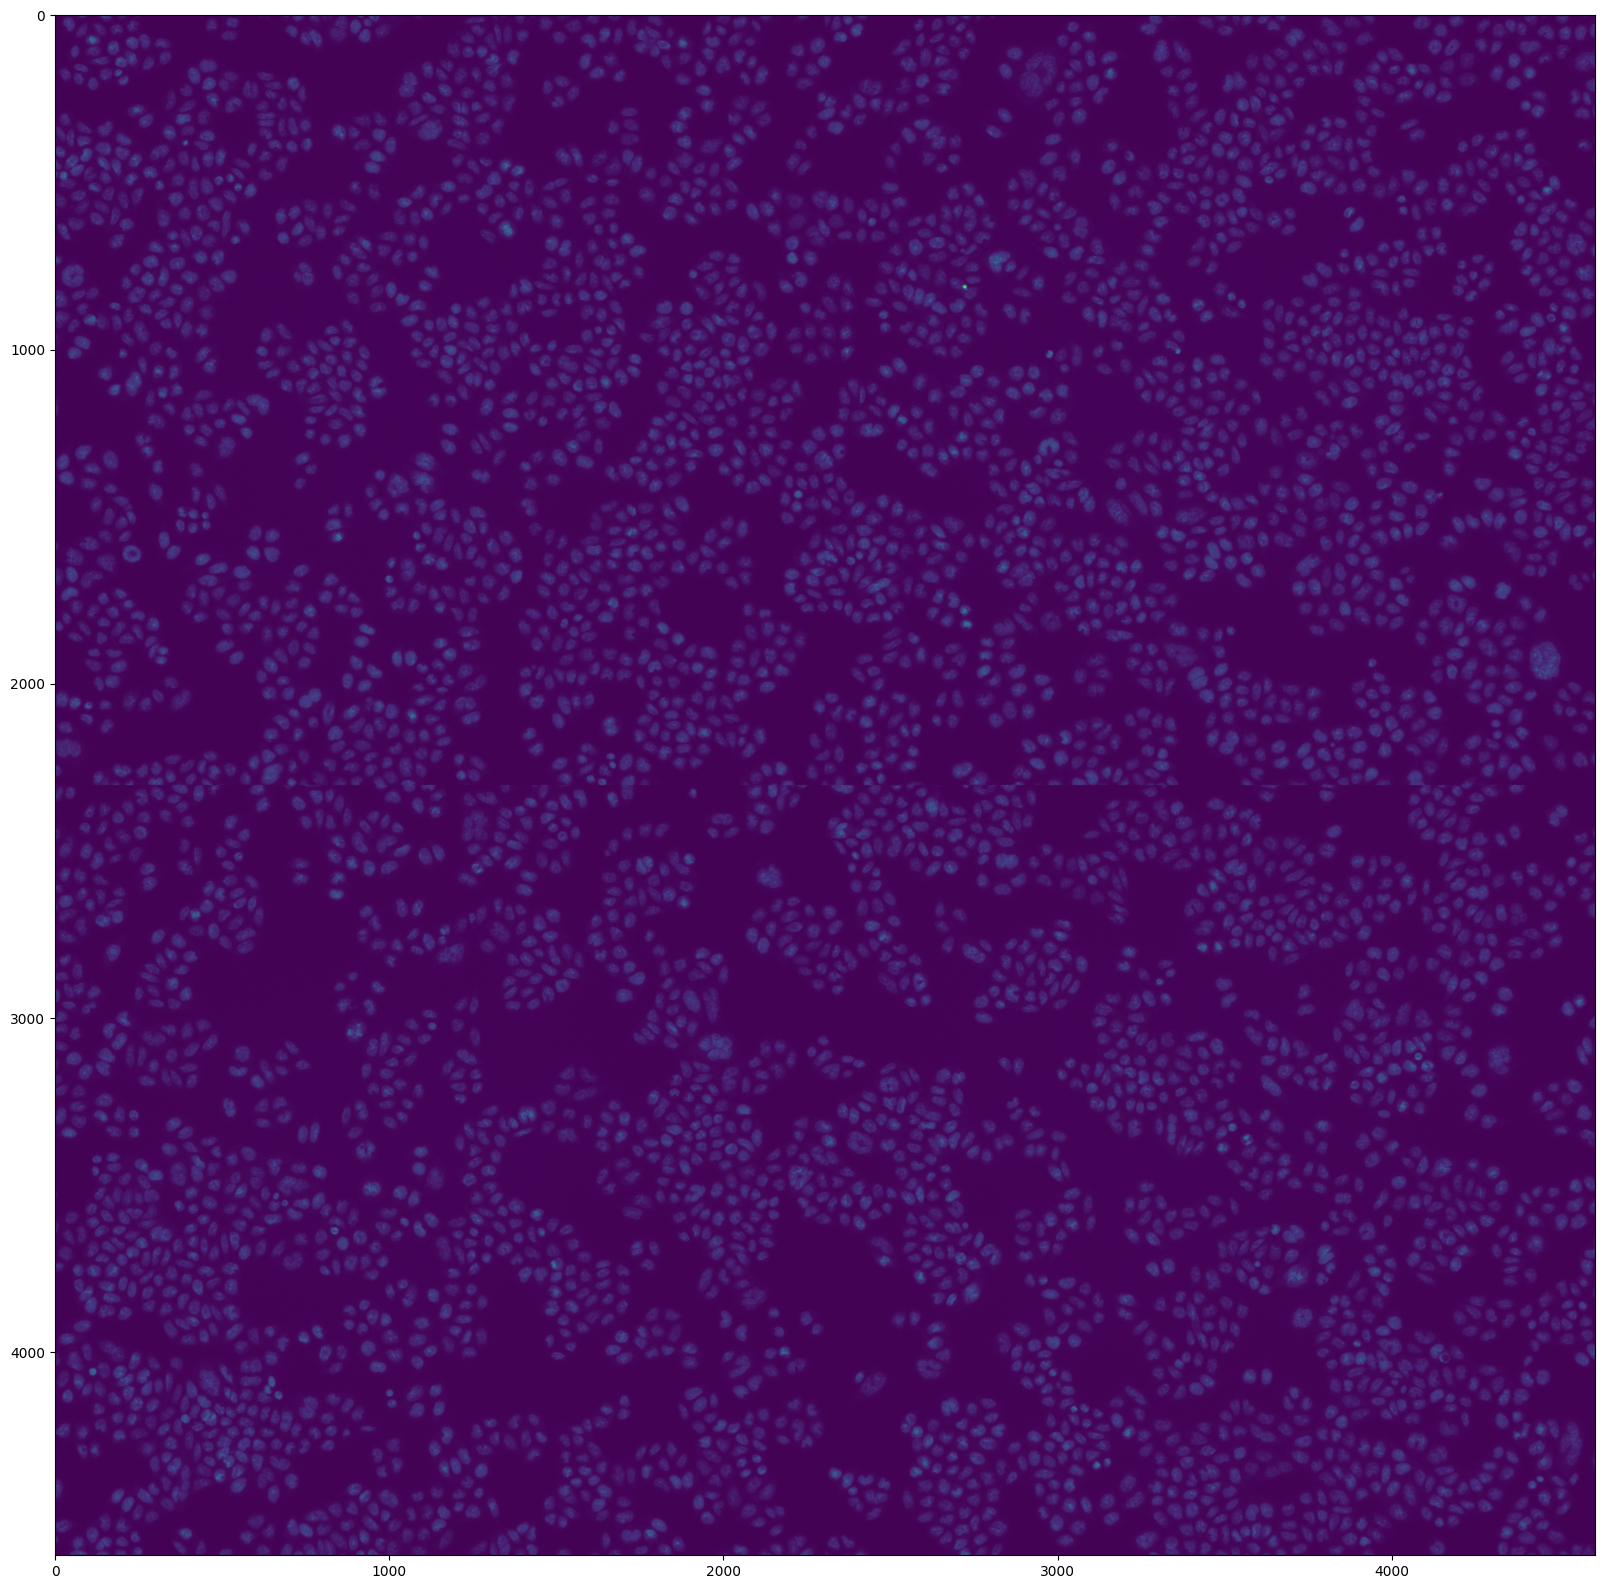

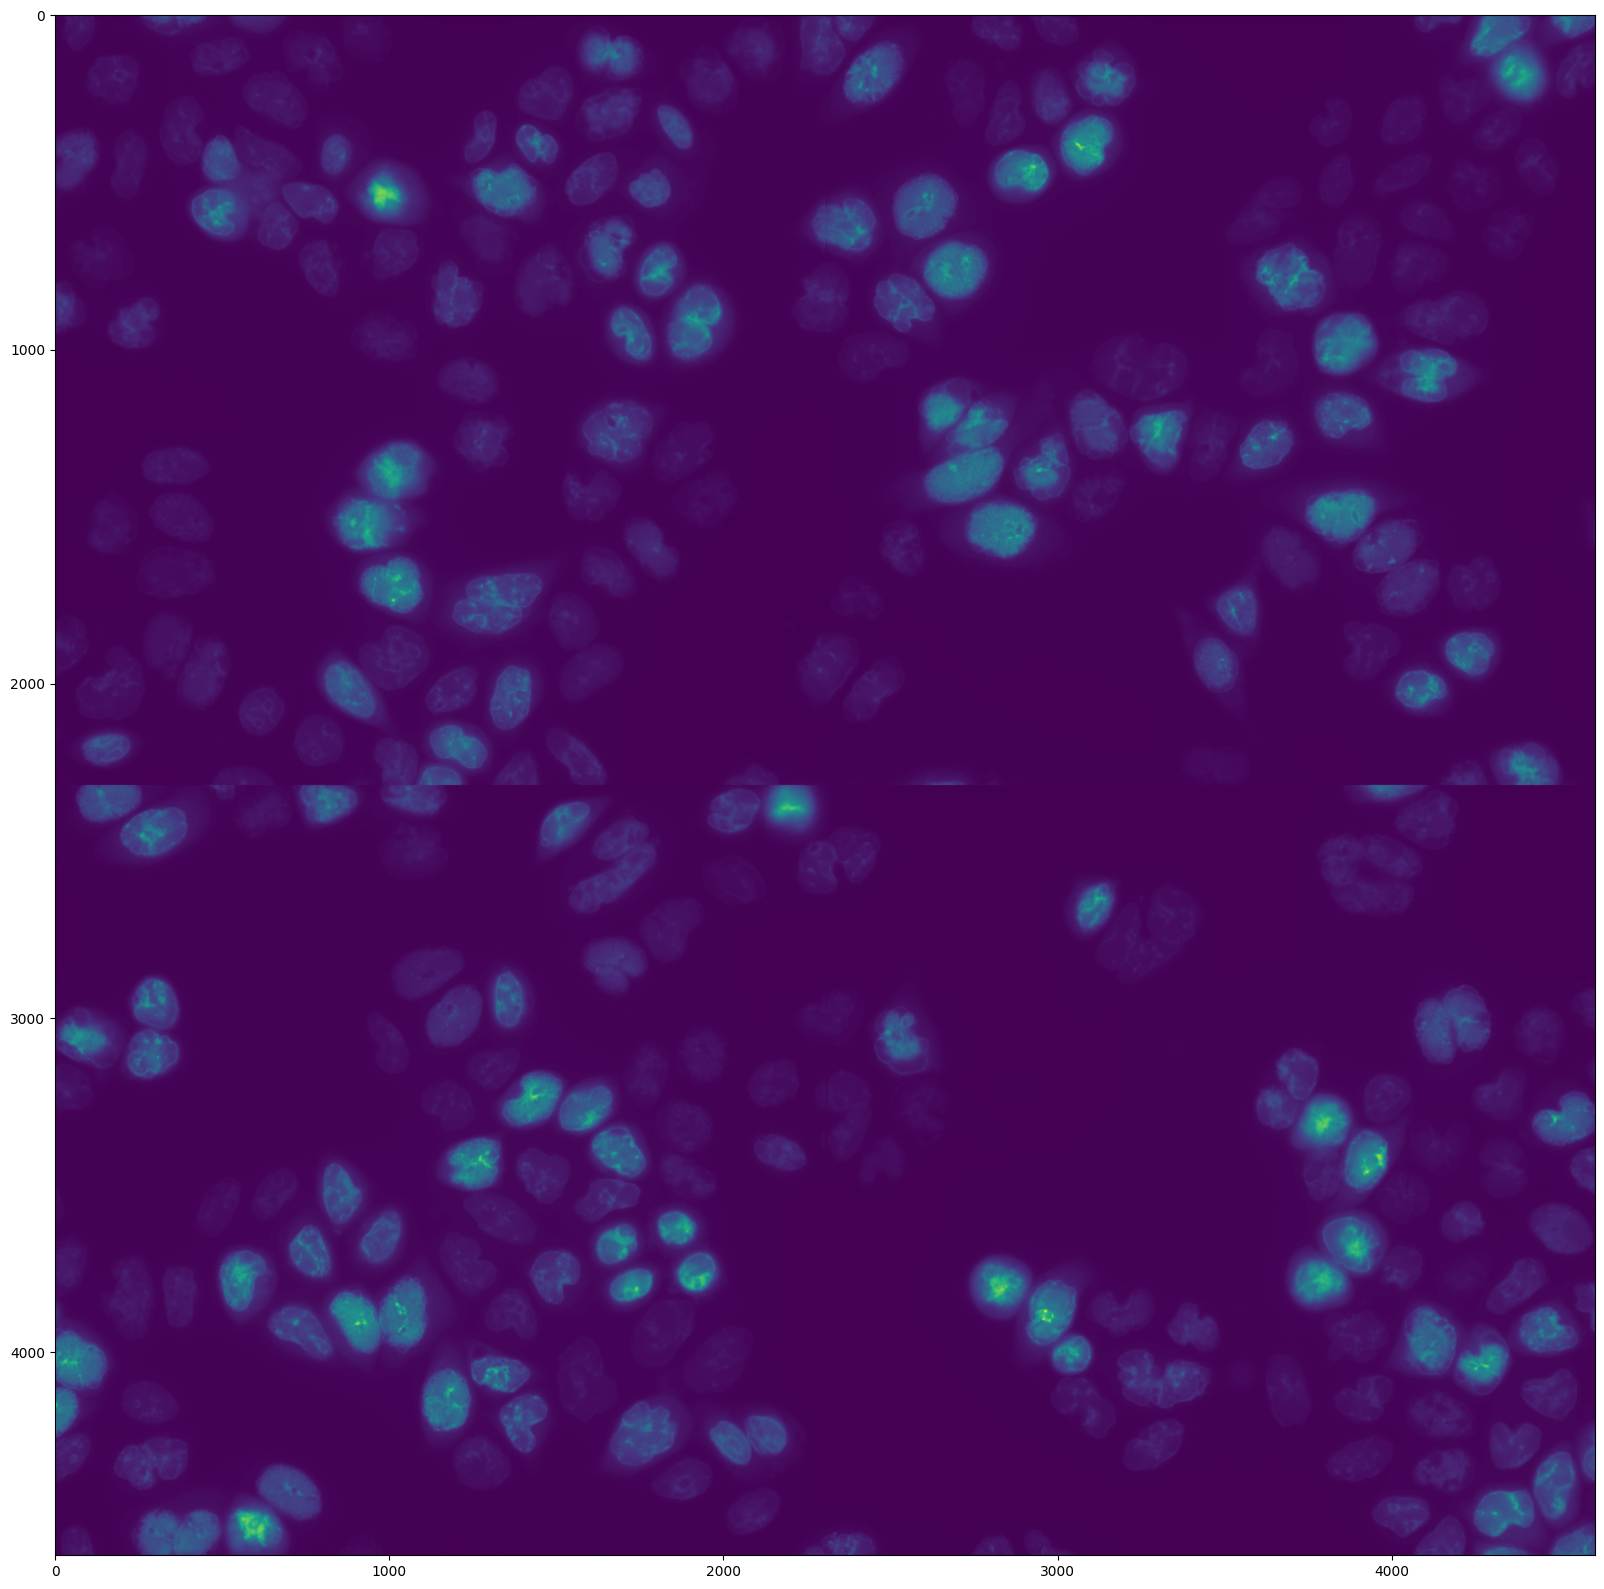

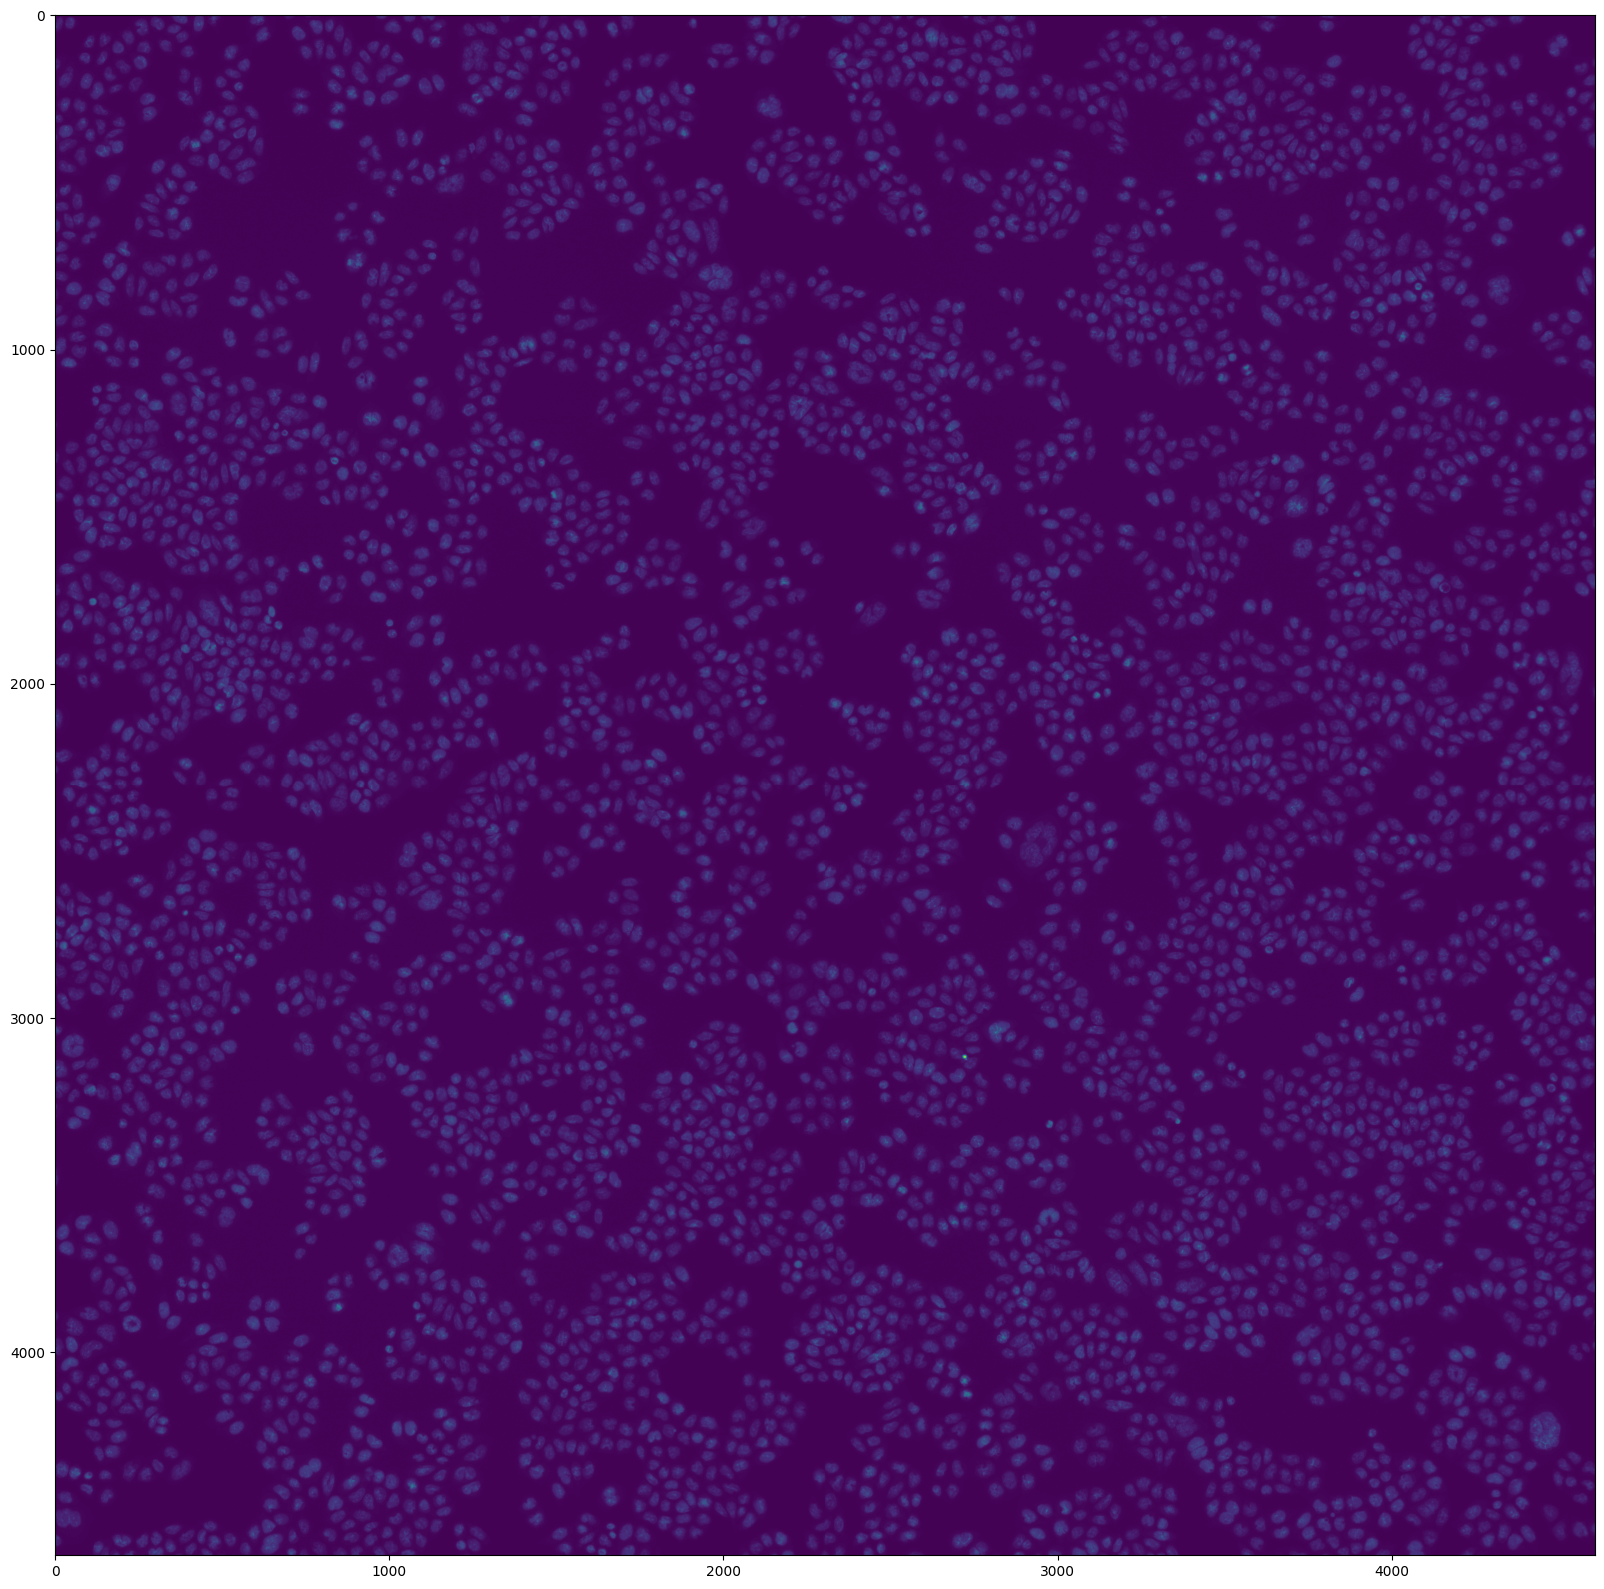

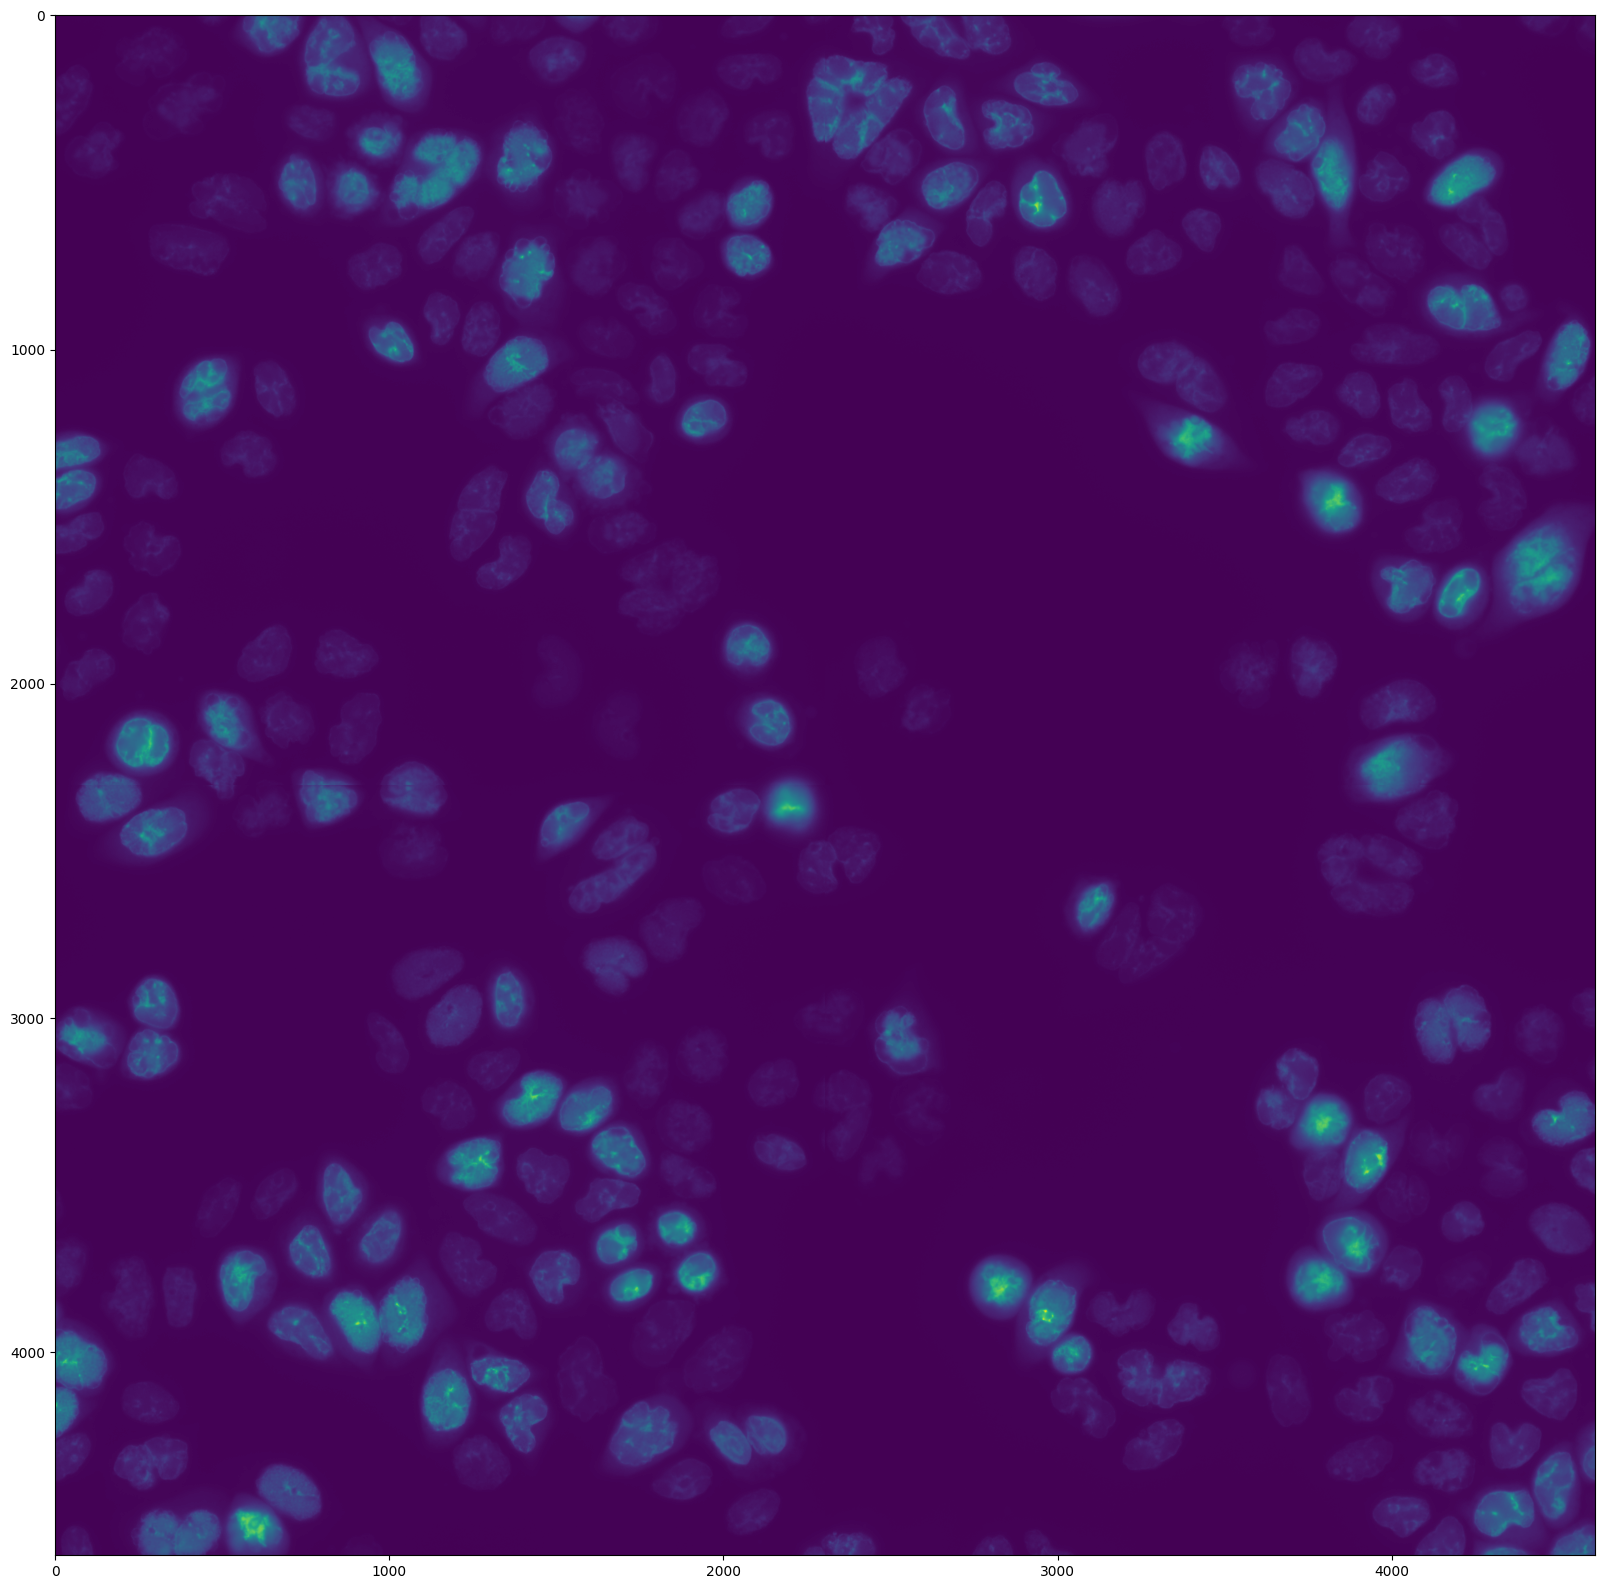

In [13]:
mf.Plot_4_Center_Tiles(M_10X, path_10X, shift=-1)
mf.Plot_4_Center_Tiles(M_40X, path_40X, shift=-1)

M_10X_rotated = np.flipud(M_10X)
M_40X_rotated = np.flipud(M_40X)

mf.Plot_4_Center_Tiles(M_10X_rotated, path_10X, shift=-1)
mf.Plot_4_Center_Tiles(M_40X_rotated, path_40X, shift=-1)

Save corrected tile layout matrix

In [15]:
np.save('M_10X.npy', M_10X_rotated)
np.save('M_40X.npy', M_40X_rotated)

pd.DataFrame(M_10X_rotated).to_csv('M_10X.csv', index=False)
pd.DataFrame(M_40X_rotated).to_csv('M_40X.csv', index=False)